In [31]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [20]:
salary_data = pd.read_csv('/Users/Tim/Documents/GitHub/NBA-Draft-Biola-Summer-Research/draft_data_2000_2016_no_empty_cells_w_salaries.csv')
current_data = pd.read_csv('/Users/Tim/Documents/GitHub/NBA-Draft-Biola-Summer-Research/draft_nba_data_2000_2016_w_PIE_cells.csv')

draft_names = np.array(current_data['PLAYER_NAME_x'])
draft_years = np.array(current_data['DRAFT_CLASS']+5)
salaries = []
salaries_tags = []
#print(draft_years)5th_YR_SALARY 	5th_YR_SALARY_TAG

for name,year in zip(draft_names,draft_years):
    salary = salary_data[(salary_data.PLAYER_NAME_x == name) & (salary_data.DRAFT_CLASS+5 == year)]
    salaries.append(salary['5th_YR_SALARY'].values[0])
    salaries_tags.append(salary['5th_YR_SALARY_TAG'].values[0])

current_data['5th_YR_SALARY'] = salaries
current_data['5th_YR_SALARY_TAG'] = salaries_tags
display(current_data)

current_data.to_csv('draft_nba_data_2000_2016_w_PIE_and_salaries.csv', index=False)

,PLAYER_ID,FIRST_NAME_x,LAST_NAME_x,PLAYER_NAME_x,POSITION_x,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,WEIGHT,WINGSPAN,WINGSPAN_FT_IN,...,REB,AST,STL,BLK,TOV,PF,PTS,PIE_5_YR,5th_YR_SALARY,5th_YR_SALARY_TAG
0,2037,Jamal,Crawford,Jamal Crawford,PG-SG,76.50,6' 4.5'',175.0,82.00,6' 10'',...,2.8,4.5,1.1,0.9,3.1,1.1,16.6,9.7,5760000,above average
1,2084,Chris,Porter,Chris Porter,SF-PF,77.50,6' 5.5'',214.0,81.50,6' 9.5'',...,7.3,1.2,2.0,0.3,2.1,2.7,14.6,0.0,0,no contract
2,2217,Brendan,Haywood,Brendan Haywood,C,83.75,6' 11.75'',266.0,90.50,7' 6.5'',...,7.3,1.3,0.5,3.6,2.0,2.9,12.3,5.0,4000000,average
3,2210,Richard,Jefferson,Richard Jefferson,SF,79.25,6' 7.25'',223.0,84.00,7' 0'',...,5.4,2.7,0.8,0.8,3.0,2.8,11.3,14.5,10200000,near max
4,2207,Joe,Johnson,Joe Johnson,SF-SG,78.75,6' 6.75'',226.0,81.00,6' 9'',...,6.4,2.6,1.4,0.4,2.3,1.5,14.2,12.5,12000000,near max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,1627756,Denzel,Valentine,Denzel Valentine,SG-SF,76.00,6' 4'',210.4,82.75,6' 10.75'',...,7.5,7.8,1.0,0.2,2.7,1.7,19.2,8.5,0,no contract
394,1627785,Isaiah,Whitehead,Isaiah Whitehead,PG-SG,75.25,6' 3.25'',210.0,80.75,6' 8.75'',...,3.6,5.1,1.2,1.4,3.5,2.3,18.2,0.0,0,no contract
395,1627786,Troy,Williams,Troy Williams,SF,77.75,6' 5.75'',217.8,80.25,6' 8.25'',...,5.8,2.0,1.1,0.8,2.7,2.2,13.3,0.0,0,no contract
396,1627787,Kyle,Wiltjer,Kyle Wiltjer,PF,80.75,6' 8.75'',242.8,84.25,7' 0.25'',...,6.3,1.5,0.4,0.8,2.1,1.8,20.4,0.0,0,no contract


In [66]:
from nba_api.stats.endpoints import drafthistory

years = np.arange(2000,2017,1)
initial = 0
for x in years:
    if initial == 0:
        current_df = drafthistory.DraftHistory(league_id='00',season_year_nullable = x).get_data_frames()[0]
        initial = 1
    else:
        next_df = drafthistory.DraftHistory(league_id='00',season_year_nullable = x).get_data_frames()[0]
        current_df = pd.concat([current_df, next_df], ignore_index=True)
        
display(current_df)
current_df.to_csv('draft_picks_2000_2016.csv', index=False)

,PERSON_ID,PLAYER_NAME,SEASON,ROUND_NUMBER,ROUND_PICK,OVERALL_PICK,DRAFT_TYPE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,ORGANIZATION,ORGANIZATION_TYPE,PLAYER_PROFILE_FLAG
0,2030,Kenyon Martin,2000,1,1,1,Draft,1610612751,New Jersey,Nets,NJN,Cincinnati,College/University,1
1,2031,Stromile Swift,2000,1,2,2,Draft,1610612763,Vancouver,Grizzlies,VAN,Louisiana State,College/University,1
2,2032,Darius Miles,2000,1,3,3,Draft,1610612746,Los Angeles,Clippers,LAC,East St. Louis,High School,1
3,2033,Marcus Fizer,2000,1,4,4,Draft,1610612741,Chicago,Bulls,CHI,Iowa State,College/University,1
4,2034,Mike Miller,2000,1,5,5,Draft,1610612753,Orlando,Magic,ORL,Florida,College/University,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,1627772,Daniel Hamilton,2016,2,26,56,Draft,1610612743,Denver,Nuggets,DEN,Connecticut,College/University,1
1005,1627845,Wang Zhelin,2016,2,27,57,Draft,1610612763,Memphis,Grizzlies,MEM,Fujian,Other Team/Club,0
1006,1627846,Abdel Nader,2016,2,28,58,Draft,1610612738,Boston,Celtics,BOS,Iowa State,College/University,1
1007,1627766,Isaiah Cousins,2016,2,29,59,Draft,1610612758,Sacramento,Kings,SAC,Oklahoma,College/University,1


# Graph Draft Pick and Salary

In [68]:
from nba_api.stats.endpoints import commonplayerinfo
draft_data = pd.read_csv('/Users/Tim/Documents/GitHub/NBA-Draft-Biola-Summer-Research/draft_data_2000_2016_no_empty_cells.csv')
draft_pick_data = pd.read_csv('/Users/Tim/Documents/GitHub/NBA-Draft-Biola-Summer-Research/draft_picks_2000_2016.csv')

draft_data_names = draft_data['PLAYER_NAME_x'].values
draft_data_year = draft_data['DRAFT_CLASS'].values

#data_df = draft_pick_data[(draft_pick_data.name.isin(draft_data_names)) & (draft_pick_data.season_start.isin(draft_data_year))]

#display(data_df)
draft_pick = []
draft_round = []

for name,year in zip(draft_data_names,draft_data_year):
    pick = draft_pick_data[(draft_pick_data.PLAYER_NAME == name)]
    if pick.empty:
        #time.sleep(3)
        #player = commonplayerinfo.CommonPlayerInfo(player_id=draft_data['PLAYER_ID'].values[0]).get_data_frames()[0]
        draft_pick.append(-1) #negative 1 stands for undrafted
        draft_round.append(-1) #negative 1 stands for undrafted
    else:
        #pick = player_df.head(1)
        #display(pick)
        draft_pick.append(pick['OVERALL_PICK'].values[0])
        draft_round.append(pick['ROUND_NUMBER'].values[0])

draft_data['DRAFT_NUMBER'] = draft_round
draft_data['DRAFT_ROUND'] = draft_pick

draft_data.to_csv('draft_data_2000_2016_no_empty_cells_w_draft_pick.csv', index=False)

# Graph of Draft Class 2000-2012 5th year PIE and Salary

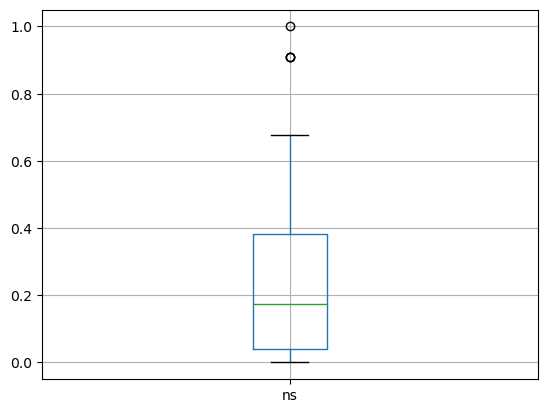

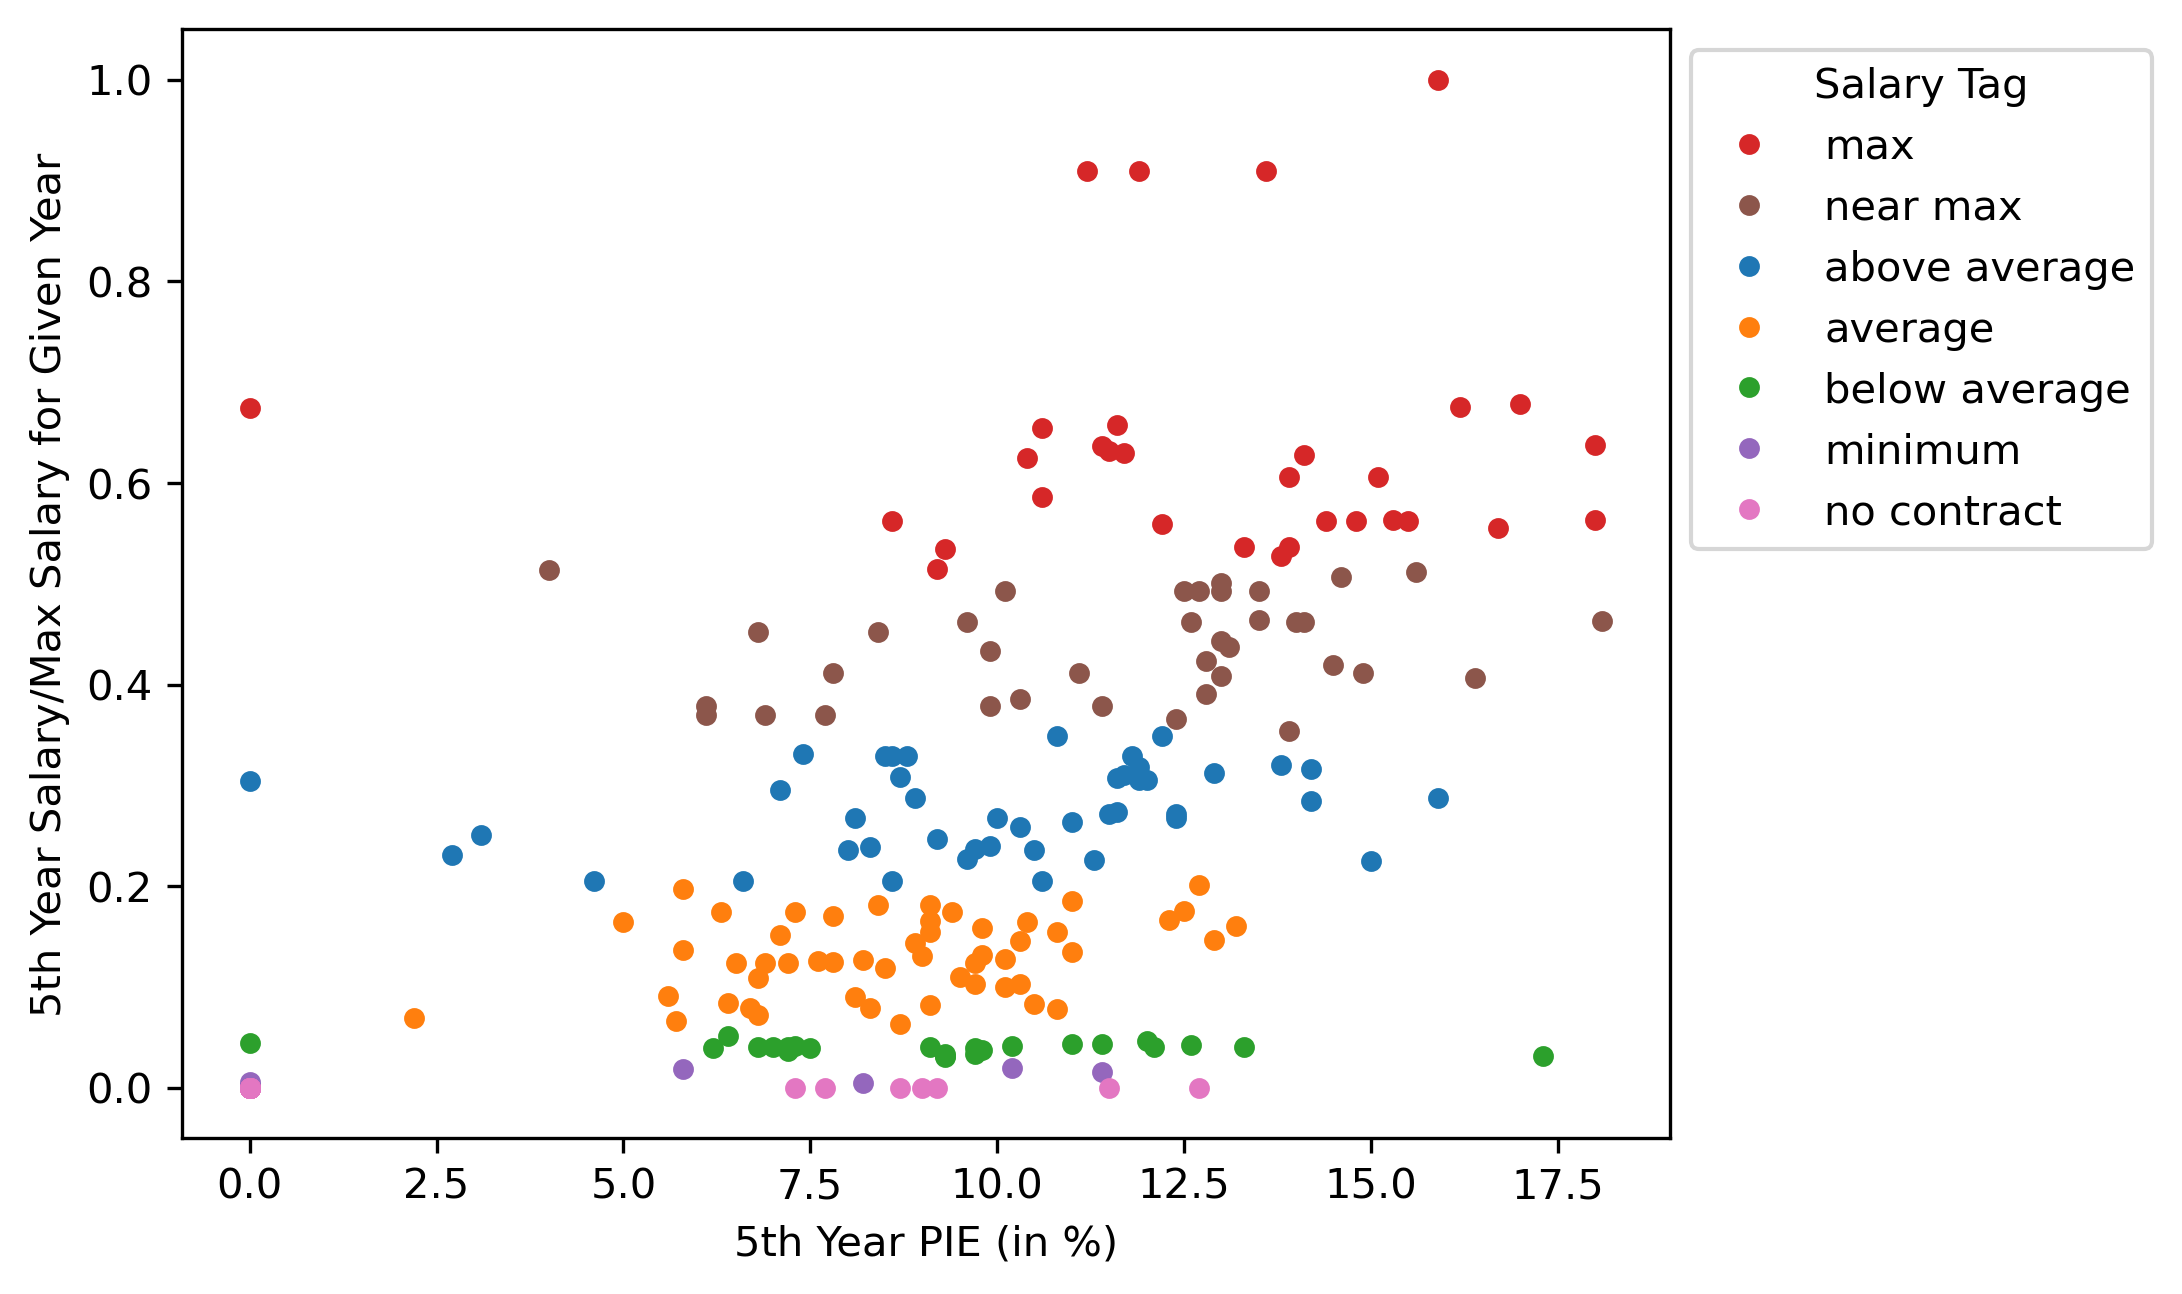

In [16]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

plt.clf()

#draft_data = pd.read_csv('/Users/Tim/Documents/GitHub/NBA-Draft-Biola-Summer-Research/draft_nba_data_2000_2016_w_PIE_and_salaries_and college_stats.csv')
draft_data = pd.read_csv('/Users/josephhartono/Downloads/nba_files/draft_nba_data_2000_2016_w_PIE_and_salaries_and college_stats.csv')
graph_data = draft_data[draft_data['DRAFT_CLASS'] < 2013]
#display(graph_data)

df = graph_data[['PIE_5_YR', '5th_YR_SALARY', '5th_YR_SALARY_TAG']]



df = df.rename(columns={"PIE_5_YR":"x"})
df = df.rename(columns={"5th_YR_SALARY":"y"})
df = df.rename(columns={"5th_YR_SALARY_TAG":"z"})



#get max salary
max = 0
for sal in df['y']:
    if sal > max:
        max = sal
normal_sal = []
for sal in df['y']:
    normal_sal.append(sal/max)
df['ns'] = normal_sal


box_ns = df['ns'].to_frame()
box_ns.boxplot()
#x = graph_data['PIE_5_YR'].values
#y = graph_data['5th_YR_SALARY'].values

#display(df)

groups = df.groupby('z')
plt.figure(dpi=300)
for name, group in groups:
    plt.plot(group.x, group.ns, marker='o', linestyle='', markersize=4, label=name)

plt.xlabel('5th Year PIE (in %)')
plt.ylabel('5th Year Salary/Max Salary for Given Year')

handles, labels = plt.gca().get_legend_handles_labels()
order = [3,5,0,1,2,4,6]


#plt.legend(bbox_to_anchor=(1,1), loc="upper left", title='Salary Tag')
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc="upper left", title="Salary Tag",bbox_to_anchor=(1,1))

plt.show()

Text(0, 0.5, '5th Year PIE (in %)')

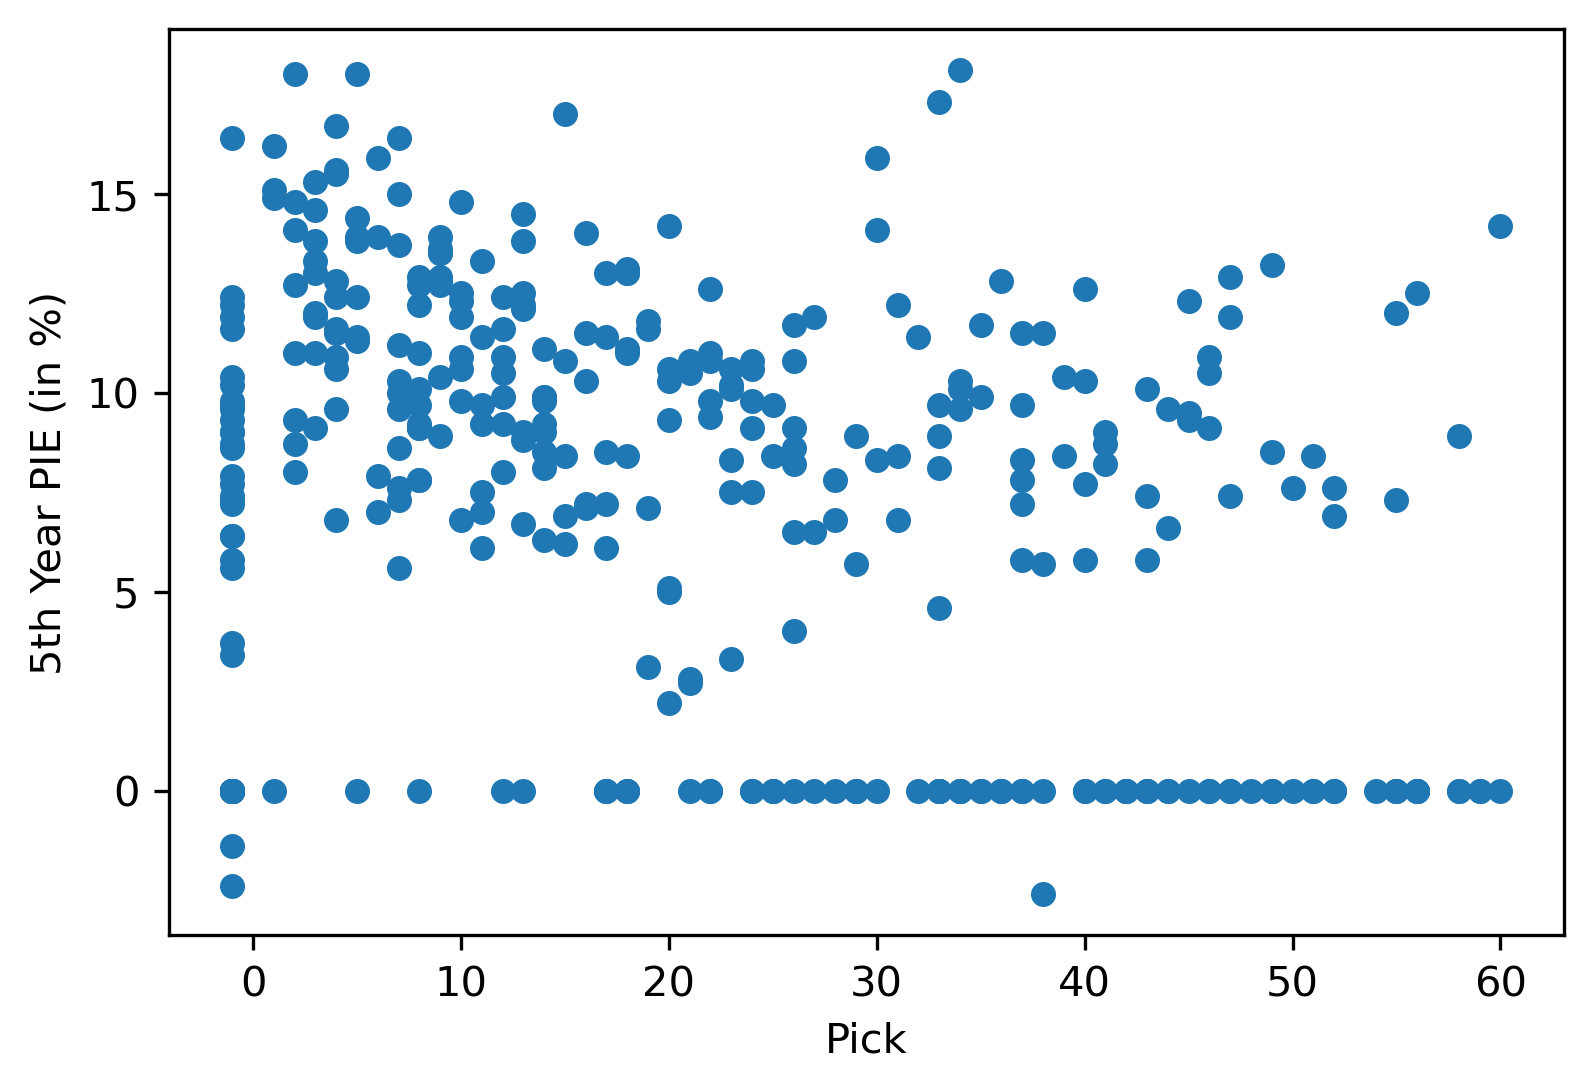

In [94]:
from nba_api.stats.endpoints import commonplayerinfo
import matplotlib.pyplot as plt
draft_pick_data = pd.read_csv('/Users/Tim/Documents/GitHub/NBA-Draft-Biola-Summer-Research/draft_data_2000_2016_no_empty_cells_w_draft_pick.csv')
draft_pie_data = pd.read_csv('/Users/Tim/Documents/GitHub/NBA-Draft-Biola-Summer-Research/draft_nba_data_2000_2016_w_PIE_and_salaries_and college_stats.csv')

draft_pie_names = draft_pie_data['PLAYER_NAME_x'].values
#print(draft_pie_names)
#picks = draft_pick_data[draft_pick_data.isn(draft_pie_names)].values
picks = []
pie = draft_pie_data['PIE_5_YR'].values
for name in draft_pie_names:
    pick = draft_pick_data[(draft_pick_data.PLAYER_NAME_x == name)]
    #print(name)
    picks.append(pick['DRAFT_NUMBER'].values[0])

#print(len(picks))
plt.figure(dpi=300)
plt.plot(picks, pie , marker='o', linestyle='', markersize=5, label=name)

plt.xlabel('Pick')
plt.ylabel('5th Year PIE (in %)')